# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

# 1. MEMUAT DATASET DARI HASIL CLUSTERING
Melihat 5 baris pertama dataset:
   Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.73                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  ...  Precipitation_Binned  \
0                       

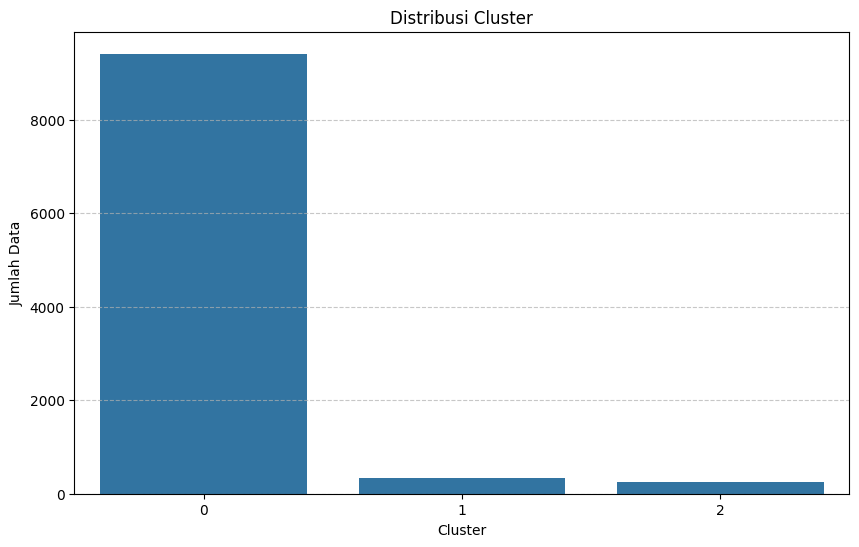

In [ ]:
print("# 1. MEMUAT DATASET DARI HASIL CLUSTERING")
# Ganti dengan lokasi file hasil clustering Anda
file_path = '/content/drive/MyDrive/dicoding/ML pemula/climate_agriculture_clustered_optimized.csv'
df = pd.read_csv(file_path)

print("Melihat 5 baris pertama dataset:")
print(df.head())

# Memeriksa informasi dataset
print("\nInformasi Dataset:")
print(df.info())

# Memeriksa distribusi cluster
print("\nDistribusi Label Cluster:")
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)

# Visualisasi distribusi cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df)
plt.title('Distribusi Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# **3. Data Splitting**

# Menentukan fitur (X) dan target (y)
# Gunakan fitur numerik dan kategori (yang sudah diencode) sebagai fitur
numeric_features = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT',
                   'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'Irrigation_Access_%',
                   'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index',
                   'Economic_Impact_Million_USD']

# Periksa apakah kolom kategorikal sudah diencode
encoded_categorical = [col for col in df.columns if col.endswith('_Encoded')]
print(f"\nKolom kategorikal yang sudah diencode: {encoded_categorical}")

# Jika kolom encode tidak ditemukan, lakukan encoding
categorical_cols = ['Country', 'Region', 'Crop_Type', 'Adaptation_Strategies']
for col in categorical_cols:
    if col+'_Encoded' not in df.columns:
        print(f"Encoding kolom {col}...")
        le = LabelEncoder()
        df[col+'_Encoded'] = le.fit_transform(df[col])
        encoded_categorical.append(col+'_Encoded')

# Gabungkan semua fitur
X_columns = numeric_features + encoded_categorical
X = df[X_columns]
y = df['Cluster']

print(f"\nJumlah fitur yang digunakan: {len(X_columns)}")
print(f"Fitur yang digunakan: {X_columns}")

# Membagi data menjadi set pelatihan dan pengujian (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nJumlah sampel pelatihan: {X_train.shape[0]}")
print(f"Jumlah sampel pengujian: {X_test.shape[0]}")
print(f"Distribusi kelas pada set pelatihan: \n{y_train.value_counts()}")
print(f"Distribusi kelas pada set pengujian: \n{y_test.value_counts()}")

# Standardisasi fitur numerik
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


Kolom kategorikal yang sudah diencode: ['Country_Encoded', 'Region_Encoded', 'Crop_Type_Encoded', 'Adaptation_Strategies_Encoded', 'Temperature_Binned_Encoded', 'Precipitation_Binned_Encoded', 'Climate_Zone_Encoded']

Jumlah fitur yang digunakan: 17
Fitur yang digunakan: ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Economic_Impact_Million_USD', 'Country_Encoded', 'Region_Encoded', 'Crop_Type_Encoded', 'Adaptation_Strategies_Encoded', 'Temperature_Binned_Encoded', 'Precipitation_Binned_Encoded', 'Climate_Zone_Encoded']

Jumlah sampel pelatihan: 8000
Jumlah sampel pengujian: 2000
Distribusi kelas pada set pelatihan: 
Cluster
0    7532
1     274
2     194
Name: count, dtype: int64
Distribusi kelas pada set pengujian: 
Cluster
0    1883
1      69
2      48
Name: count, dtype: int64


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
# a. Membangun Model Klasifikasi

# Model 1: Random Forest
print("\n--- Pelatihan Model Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluasi model pada data pelatihan
rf_train_pred = rf_model.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
rf_train_f1 = f1_score(y_train, rf_train_pred, average='weighted')
print(f"Akurasi pada data pelatihan: {rf_train_accuracy:.4f}")
print(f"F1-Score pada data pelatihan: {rf_train_f1:.4f}")

# Model 2: Gradient Boosting
print("\n--- Pelatihan Model Gradient Boosting ---")
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluasi model pada data pelatihan
gb_train_pred = gb_model.predict(X_train)
gb_train_accuracy = accuracy_score(y_train, gb_train_pred)
gb_train_f1 = f1_score(y_train, gb_train_pred, average='weighted')
print(f"Akurasi pada data pelatihan: {gb_train_accuracy:.4f}")
print(f"F1-Score pada data pelatihan: {gb_train_f1:.4f}")


--- Pelatihan Model Random Forest ---
Akurasi pada data pelatihan: 1.0000
F1-Score pada data pelatihan: 1.0000

--- Pelatihan Model Gradient Boosting ---
Akurasi pada data pelatihan: 1.0000
F1-Score pada data pelatihan: 1.0000


Tulis narasi atau penjelasan algoritma yang Anda gunakan.
1. Random Forest Classifier:
   Random Forest adalah metode ensemble yang membangun banyak decision tree dan menggabungkan hasilnya.
   Kelebihan:
   - Mampu menangani dataset dengan dimensi tinggi dan variabel non-linier
   - Tahan terhadap overfitting dibanding decision tree tunggal
   - Memberikan informasi feature importance

2. Gradient Boosting Classifier:
   Gradient Boosting adalah metode ensemble yang membangun model secara sekuensial, di mana setiap model
   mencoba memperbaiki kesalahan model sebelumnya.
   Kelebihan:
   - Biasanya memberikan akurasi yang sangat baik
   - Mampu menangani berbagai jenis data
   - Kemampuan memodelkan interaksi kompleks antar fiturTulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


--- Evaluasi Model Random Forest pada Data Pengujian ---
Akurasi: 0.9920
F1-Score: 0.9919

Confusion Matrix (Random Forest):
[[1879    2    2]
 [   6   63    0]
 [   6    0   42]]


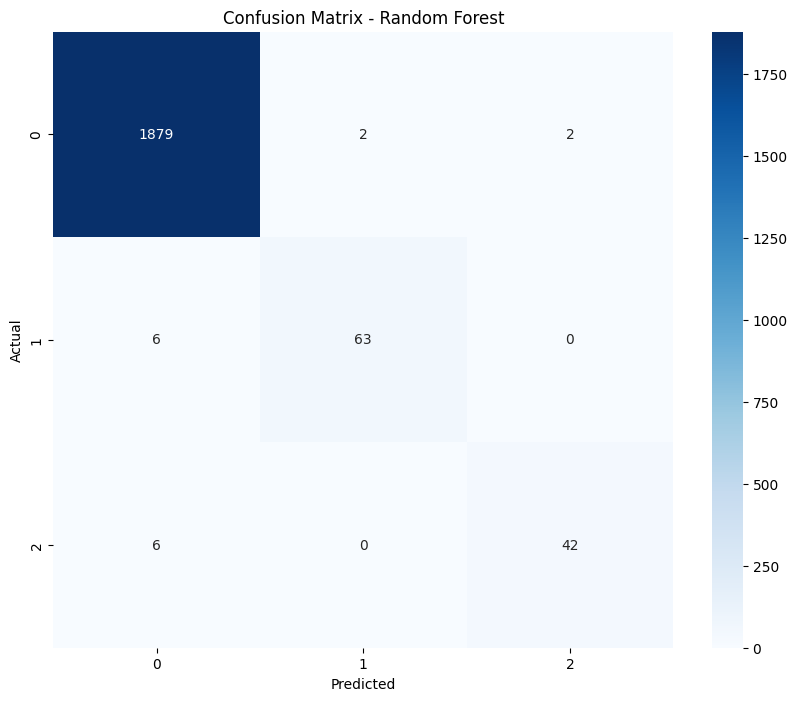


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1883
           1       0.97      0.91      0.94        69
           2       0.95      0.88      0.91        48

    accuracy                           0.99      2000
   macro avg       0.97      0.93      0.95      2000
weighted avg       0.99      0.99      0.99      2000


--- Evaluasi Model Gradient Boosting pada Data Pengujian ---
Akurasi: 0.9965
F1-Score: 0.9965

Confusion Matrix (Gradient Boosting):
[[1880    3    0]
 [   4   65    0]
 [   0    0   48]]


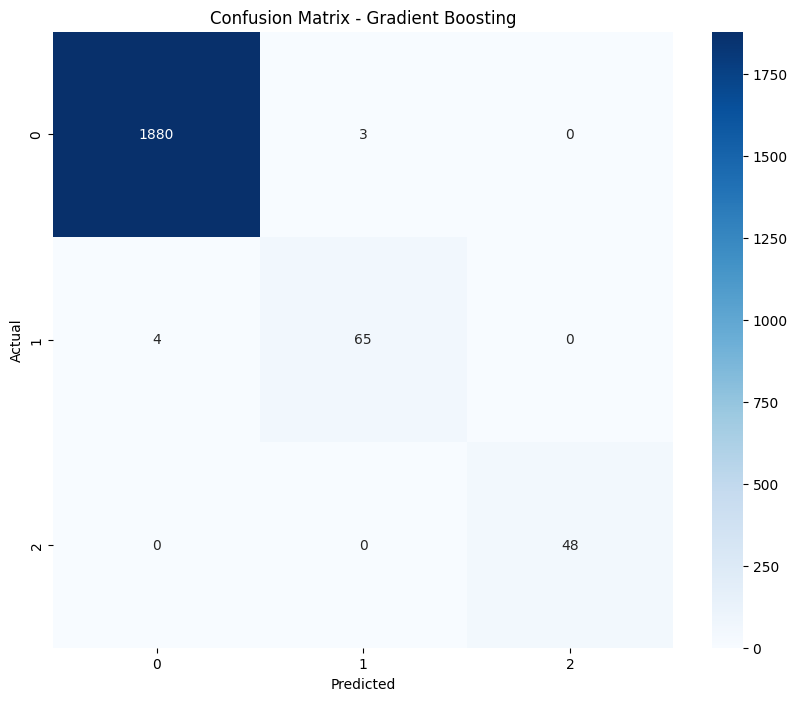


Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1883
           1       0.96      0.94      0.95        69
           2       1.00      1.00      1.00        48

    accuracy                           1.00      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       1.00      1.00      1.00      2000



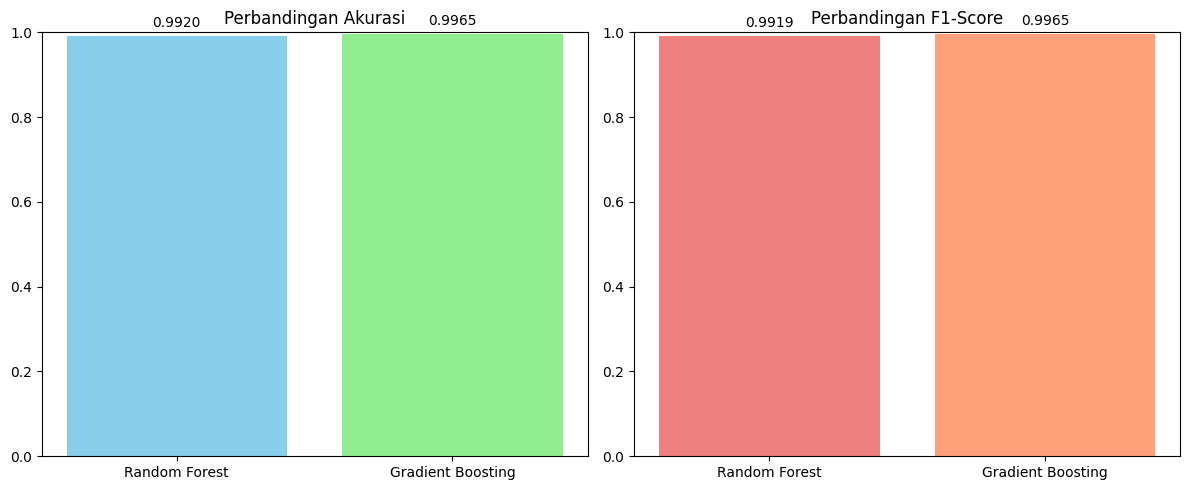

In [ ]:
# b. Evaluasi Model Klasifikasi

# Evaluasi Model 1: Random Forest
print("\n--- Evaluasi Model Random Forest pada Data Pengujian ---")
rf_test_pred = rf_model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
rf_test_f1 = f1_score(y_test, rf_test_pred, average='weighted')
print(f"Akurasi: {rf_test_accuracy:.4f}")
print(f"F1-Score: {rf_test_f1:.4f}")

# Confusion matrix untuk Random Forest
print("\nConfusion Matrix (Random Forest):")
rf_cm = confusion_matrix(y_test, rf_test_pred)
print(rf_cm)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report untuk Random Forest
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, rf_test_pred))

# Evaluasi Model 2: Gradient Boosting
print("\n--- Evaluasi Model Gradient Boosting pada Data Pengujian ---")
gb_test_pred = gb_model.predict(X_test)
gb_test_accuracy = accuracy_score(y_test, gb_test_pred)
gb_test_f1 = f1_score(y_test, gb_test_pred, average='weighted')
print(f"Akurasi: {gb_test_accuracy:.4f}")
print(f"F1-Score: {gb_test_f1:.4f}")

# Confusion matrix untuk Gradient Boosting
print("\nConfusion Matrix (Gradient Boosting):")
gb_cm = confusion_matrix(y_test, gb_test_pred)
print(gb_cm)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report untuk Gradient Boosting
print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test, gb_test_pred))

# Visualisasi perbandingan performa model
models = ['Random Forest', 'Gradient Boosting']
accuracy_scores = [rf_test_accuracy, gb_test_accuracy]
f1_scores = [rf_test_f1, gb_test_f1]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].bar(models, accuracy_scores, color=['skyblue', 'lightgreen'])
ax[0].set_ylim(0, 1.0)
ax[0].set_title('Perbandingan Akurasi')
for i, v in enumerate(accuracy_scores):
    ax[0].text(i, v + 0.02, f'{v:.4f}', ha='center')

ax[1].bar(models, f1_scores, color=['lightcoral', 'lightsalmon'])
ax[1].set_ylim(0, 1.0)
ax[1].set_title('Perbandingan F1-Score')
for i, v in enumerate(f1_scores):
    ax[1].text(i, v + 0.02, f'{v:.4f}', ha='center')

plt.tight_layout()
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

1. Evaluasi Model Random Forest
  - Akurasi: 0.9920
  - F1-Score: 0.9919
  - Analisis:
    - Model Random Forest menunjukkan performa yang sangat baik dengan akurasi tinggi sebesar 99.20%.
    - Kelas mayoritas (kelas 0) diklasifikasikan dengan sangat baik dengan precision dan recall mendekati 1.00.
    - Kelas minoritas (kelas 1 dan 2) mengalami sedikit kesalahan dengan recall yang lebih rendah pada kelas 1 (0.91) dan kelas 2 (0.88), menunjukkan bahwa beberapa sampel dari kelas ini diklasifikasikan secara salah.

2. Evaluasi Model Gradient Boosting
  - Akurasi: 0.9965
  - F1-Score: 0.9965
  - Analisis:
    - Model Gradient Boosting memiliki akurasi lebih tinggi dibandingkan dengan Random Forest, yaitu 99.65%.
    - Precision dan recall pada kelas mayoritas (kelas 0) tetap optimal.
    - Kelas 2 memiliki performa sempurna dengan precision dan recall 1.00, yang berarti semua sampel dalam kelas ini berhasil diklasifikasikan dengan benar.
    - Kelas 1 memiliki peningkatan recall dari 0.91 menjadi 0.94, yang berarti model ini lebih baik dalam mengenali sampel dari kelas tersebut dibandingkan Random Forest.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
# c. Tuning Model Klasifikasi (Optional)

# Memilih model terbaik untuk tuning
if rf_test_f1 > gb_test_f1:
    best_model_name = "Random Forest"
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    best_base_model = RandomForestClassifier(random_state=42)
else:
    best_model_name = "Gradient Boosting"
    param_grid = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    }
    best_base_model = GradientBoostingClassifier(random_state=42)

print(f"\n--- Tuning Model {best_model_name} ---")
print("Proses ini mungkin memerlukan waktu beberapa menit...")

# Menggunakan grid search untuk menemukan parameter terbaik
grid_search = GridSearchCV(
    estimator=best_base_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross validation
    scoring='f1_weighted',
    n_jobs=-1  # Gunakan semua core CPU
)

grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("\nParameter terbaik dari grid search:")
print(grid_search.best_params_)


--- Tuning Model Gradient Boosting ---
Proses ini mungkin memerlukan waktu beberapa menit...

Parameter terbaik dari grid search:
{'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


--- Hasil Evaluasi Model Setelah Tuning ---
Akurasi pada data pelatihan: 1.0000
F1-Score pada data pelatihan: 1.0000
Akurasi pada data pengujian: 0.9935
F1-Score pada data pengujian: 0.9934

Confusion Matrix (Model setelah tuning):
[[1879    3    1]
 [   7   62    0]
 [   2    0   46]]


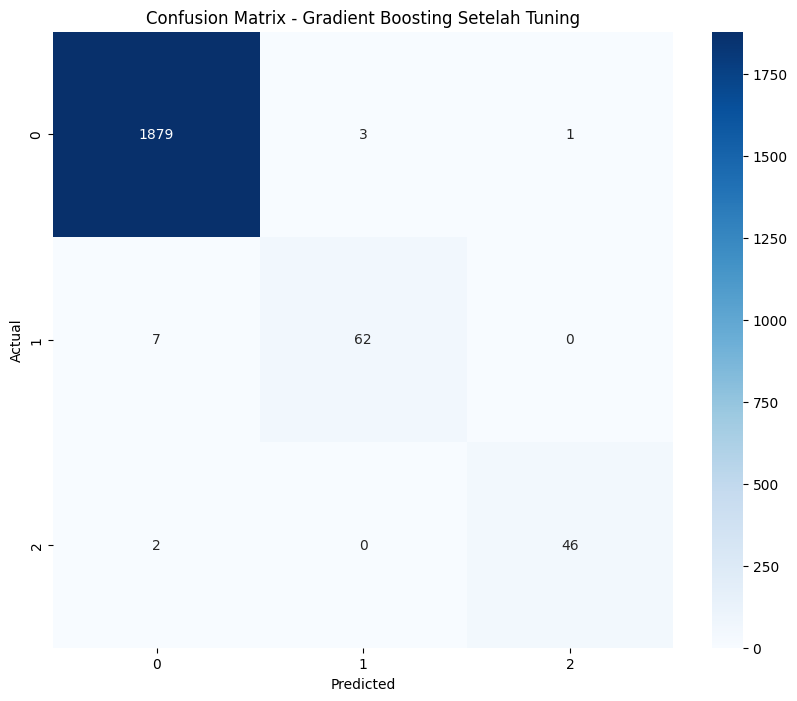


Classification Report (Model setelah tuning):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1883
           1       0.95      0.90      0.93        69
           2       0.98      0.96      0.97        48

    accuracy                           0.99      2000
   macro avg       0.98      0.95      0.96      2000
weighted avg       0.99      0.99      0.99      2000



In [ ]:
# d. Evaluasi Model Klasifikasi setelah Tuning (Optional)

# Evaluasi model setelah tuning
tuned_model = grid_search.best_estimator_
tuned_train_pred = tuned_model.predict(X_train)
tuned_test_pred = tuned_model.predict(X_test)

# Hitung metrik untuk data pelatihan dan pengujian
tuned_train_accuracy = accuracy_score(y_train, tuned_train_pred)
tuned_train_f1 = f1_score(y_train, tuned_train_pred, average='weighted')
tuned_test_accuracy = accuracy_score(y_test, tuned_test_pred)
tuned_test_f1 = f1_score(y_test, tuned_test_pred, average='weighted')

print("\n--- Hasil Evaluasi Model Setelah Tuning ---")
print(f"Akurasi pada data pelatihan: {tuned_train_accuracy:.4f}")
print(f"F1-Score pada data pelatihan: {tuned_train_f1:.4f}")
print(f"Akurasi pada data pengujian: {tuned_test_accuracy:.4f}")
print(f"F1-Score pada data pengujian: {tuned_test_f1:.4f}")

# Confusion matrix untuk model yang sudah di-tuning
tuned_cm = confusion_matrix(y_test, tuned_test_pred)
print("\nConfusion Matrix (Model setelah tuning):")
print(tuned_cm)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(tuned_cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name} Setelah Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report untuk model yang sudah di-tuning
print("\nClassification Report (Model setelah tuning):")
print(classification_report(y_test, tuned_test_pred))

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.



1. Perbandingan Sebelum dan Setelah Tuning
  - Setelah tuning, akurasi model meningkat dari 0.9920 menjadi 0.9935 pada data pengujian.
  - F1-score juga mengalami sedikit peningkatan dari 0.9919 menjadi 0.9934.
  - Performa model pada data pelatihan mencapai 100% akurasi, yang mengindikasikan kemungkinan overfitting.
2. Identifikasi Kelemahan Model
  - Overfitting: Model mencapai akurasi 100% pada data pelatihan, yang dapat menandakan bahwa model terlalu menyesuaikan dengan data pelatihan dan mungkin tidak cukup generalisasi untuk data baru.
  - Recall pada kelas 1 masih lebih rendah dibanding kelas lain (0.90), menunjukkan bahwa model masih mengalami sedikit kesulitan dalam mengenali kelas minoritas ini.
  - Performa kelas 2 meningkat setelah tuning, dengan recall naik dari 0.88 menjadi 0.96, yang berarti model lebih mampu mengenali sampel dari kelas ini.
3. Rekomendasi Tindakan Lanjutan
  - Mengatasi Overfitting:
    - Menggunakan teknik regularisasi seperti Dropout atau Pengurangan jumlah parameter model.
    - Melakukan cross-validation lebih lanjut untuk memastikan model tidak hanya belajar dari noise dalam data pelatihan.
  - Meningkatkan Recall pada Kelas 1:
    - Mengumpulkan lebih banyak data untuk kelas minoritas agar model dapat belajar lebih baik.
    - Menggunakan teknik data augmentation atau SMOTE (Synthetic Minority Over-sampling Technique) untuk menyeimbangkan distribusi kelas.
  - Eksplorasi Algoritma Lain:
    - Mencoba algoritma XGBoost atau CatBoost, yang sering kali memberikan performa lebih baik daripada Gradient Boosting dalam beberapa kasus.
    - Mengkombinasikan model dengan ensemble learning, seperti stacking atau voting classifier, untuk meningkatkan generalisasi model.